# LOAN PREDICTION

# Aim -The aim of project is to predict which customers will have their loan approved is applied

Problem Statement:
    
Build a machine learning model that predicts whether a loan application should be approved or not based on various applicant features and historical loan data

In [1]:
import pandas as pd
import numpy as np

##visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#statistic libraies
import scipy.stats as ss

#Default theme
sns.set(context="notebook", style="darkgrid", palette="deep", font="sans_self", font_scale=1, color_codes=False, rc=None)


import warnings
warnings.filterwarnings("ignore")

# Data Preprocessing

In [2]:
data=pd.read_csv("loan_prediction_data.csv")

In [3]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
data.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [5]:
#dta information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:

data.describe(percentiles=[0.25,0.75,0.8,0.9,0.95,0.99]) 

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
80%,6252.400000,2535.000000,182.000000,360.00000,1.000000
90%,9459.900000,3782.200000,235.800000,360.00000,1.000000
95%,14583.000000,4997.400000,297.800000,360.00000,1.000000


In [7]:
data.isna().sum().sort_values()

Loan_ID               0
Education             0
ApplicantIncome       0
CoapplicantIncome     0
Property_Area         0
Loan_Status           0
Married               3
Gender               13
Loan_Amount_Term     14
Dependents           15
LoanAmount           22
Self_Employed        32
Credit_History       50
dtype: int64

# Data Visualisation

Univarient Analysis

In [8]:
np.array([data.columns])

array([['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
        'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome',
        'LoanAmount', 'Loan_Amount_Term', 'Credit_History',
        'Property_Area', 'Loan_Status']], dtype=object)

In [9]:
num_cols=["ApplicantIncome","CoapplicantIncome","LoanAmount","Loan_Amount_Term"]

cat_cols=[ 'Gender', 'Married', 'Dependents', 'Education','Self_Employed','Credit_History',
          'Property_Area', 'Loan_Status']

In [10]:
num_cols

['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']

In [11]:
cat_cols

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Credit_History',
 'Property_Area',
 'Loan_Status']

# 1.Numeric Columns

Univarient Analysis

findfont: Font family ['sans_self'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans_self'] not found. Falling back to DejaVu Sans.


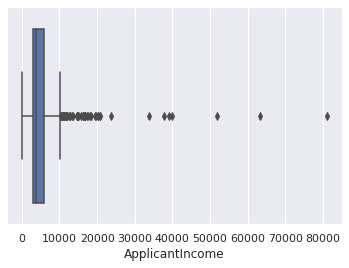

In [12]:
sns.boxplot(x="ApplicantIncome",data=data)
plt.show()

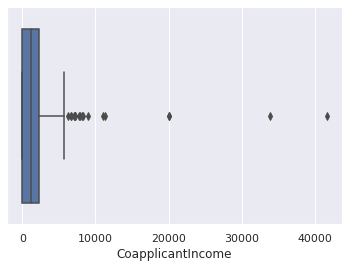

In [13]:
sns.boxplot("CoapplicantIncome",data=data)
plt.show()

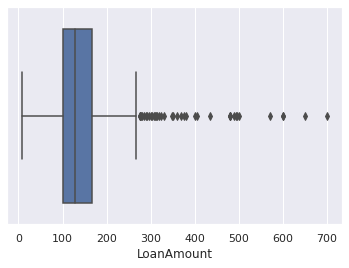

In [14]:
sns.boxplot("LoanAmount",data=data)
plt.show()

In [15]:
#seen above data has outlier

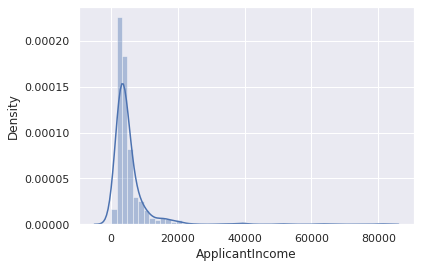

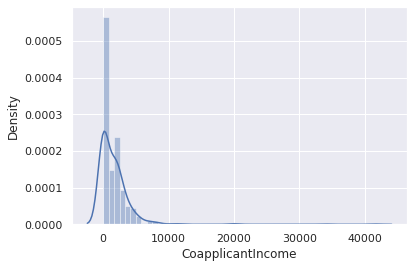

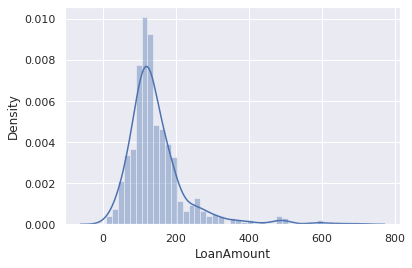

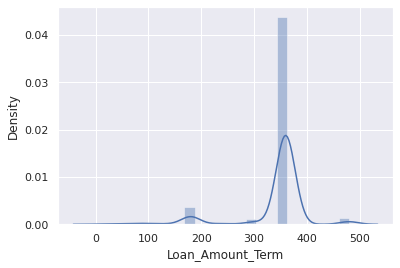

In [16]:
#Histograms
for i in ["ApplicantIncome","CoapplicantIncome","LoanAmount","Loan_Amount_Term"]:
    sns.distplot(data[i].dropna())
    plt.show()

# 2.Categorical columns

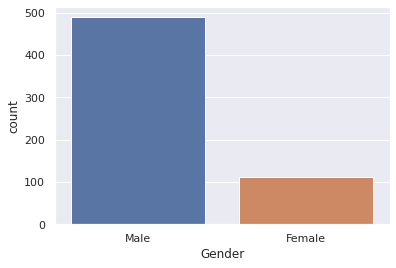

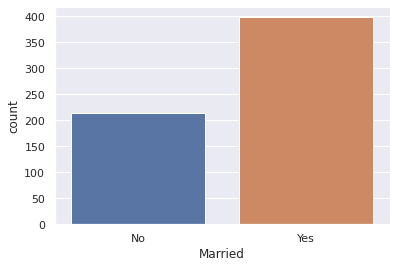

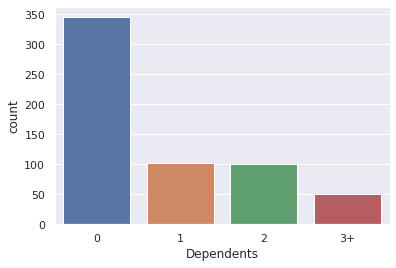

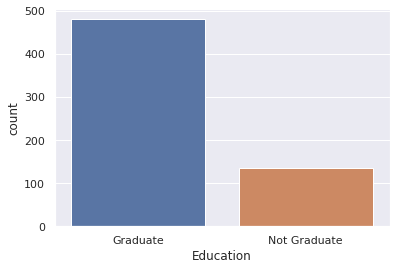

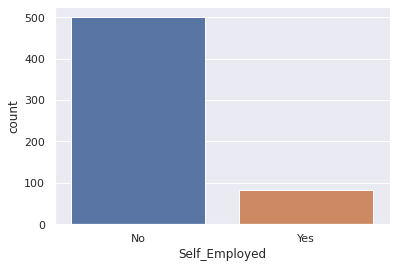

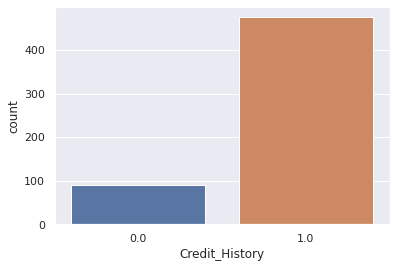

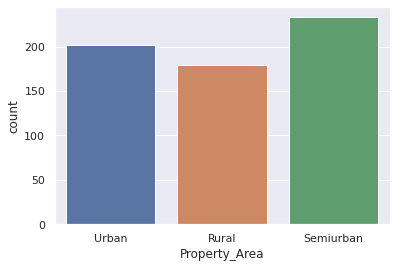

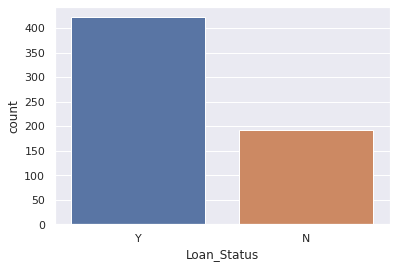

In [17]:
for i in cat_cols:
    f,axes=plt.subplots(figsize=(6,4))
    sns.countplot(x=i,data=data)
    plt.show()

Bivarian Analysis

continuous-continuous variable

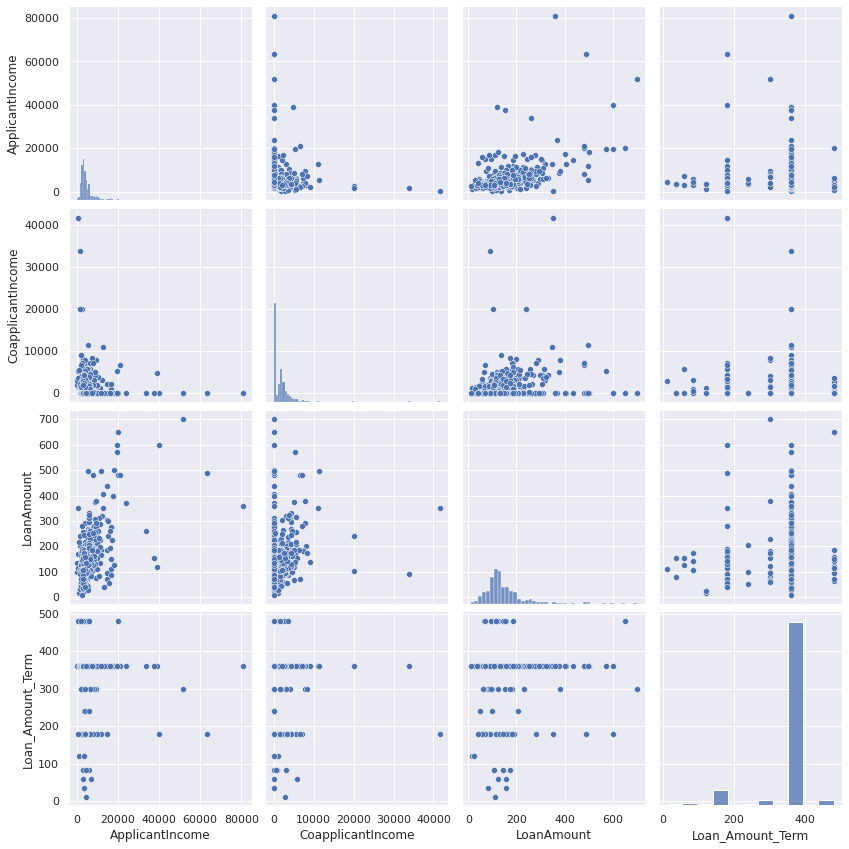

In [18]:
#scatterplot numerical data
sns.pairplot(data[num_cols].dropna(),size=3)
plt.show()

<AxesSubplot:>

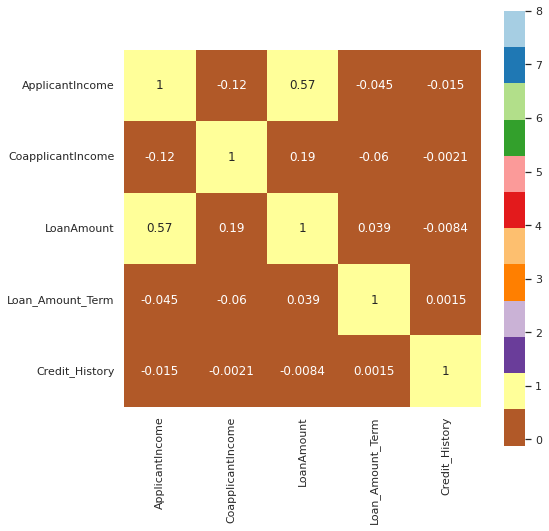

In [19]:
#correlation 
corrmat=data.corr()
f,axes=plt.subplots(figsize=(8,8))
sns.heatmap(corrmat,annot=True,vmax=8,square=True,cmap="Paired_r")

Categorical-Categorical Variable

In [20]:
cat_cols=[ 'Gender', 'Married', 'Dependents', 'Education','Self_Employed','Credit_History',
          'Property_Area', 'Loan_Status']
cat_cols

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Credit_History',
 'Property_Area',
 'Loan_Status']

In [21]:

def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    
    return np.sqrt(phi2 / min((k - 1), (r - 1)))

In [22]:
cat_association = pd.DataFrame()
for i in cat_cols:
    for j in cat_cols:
        try:
            cat_association.loc[i, j] = cramers_v(data[i], data[j])
        except:
            pass
            
               

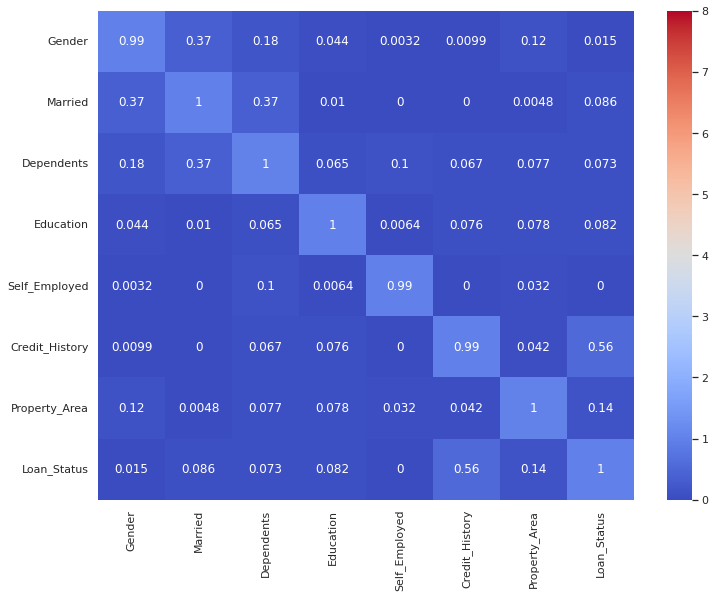

In [23]:
f,axes=plt.subplots(figsize=(12,9))
sns.heatmap(cat_association,annot=True,vmax=8,cmap='coolwarm')
plt.show()

findfont: Font family ['sans_self'] not found. Falling back to DejaVu Sans.


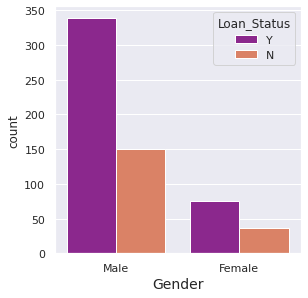

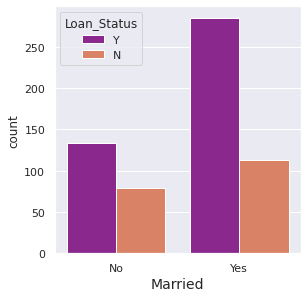

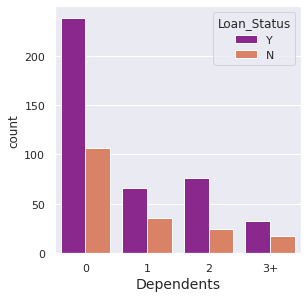

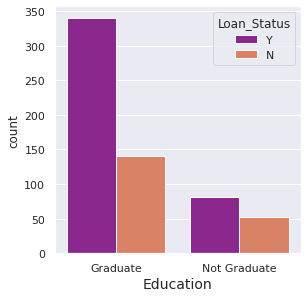

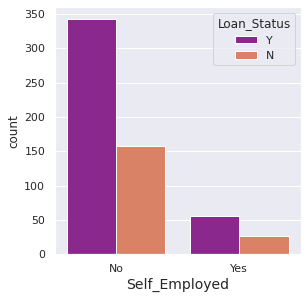

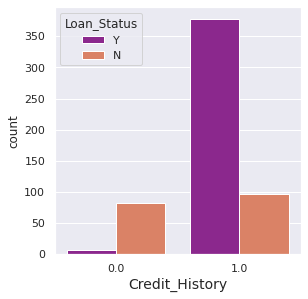

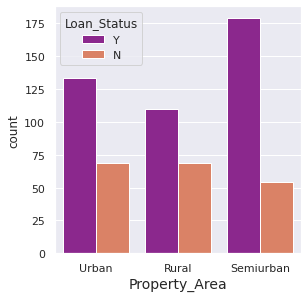

In [24]:
for i in cat_cols[:-1]:
    plt.figure(figsize=(15,10))
    plt.subplot(2,3,1)
    sns.countplot(x=i,hue="Loan_Status",data=data,palette="plasma")
    plt.xlabel(i,fontsize=14)
    

# 3.Categorical & Continuous Variable

In [25]:
data["Loan_Status"]=data["Loan_Status"].map({'Y':1,'N':0})
data["Loan_Status"]=data["Loan_Status"].astype('int')

In [26]:
data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status            int32
dtype: object

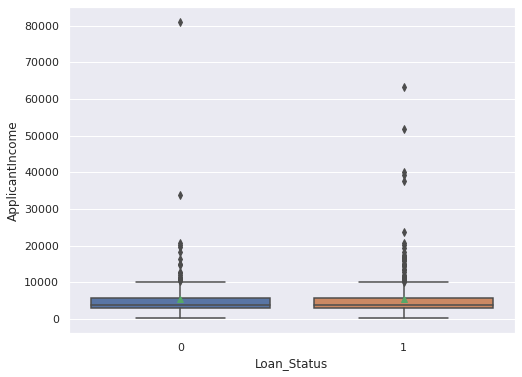

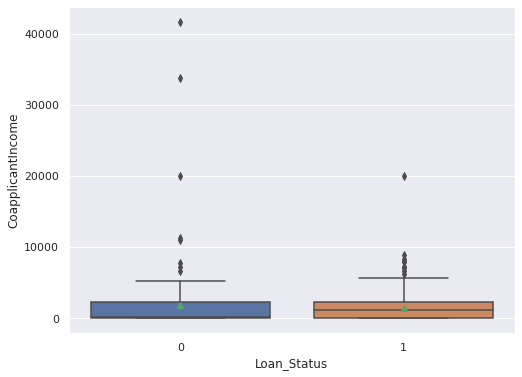

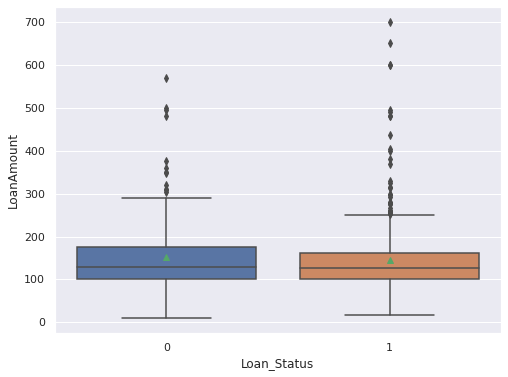

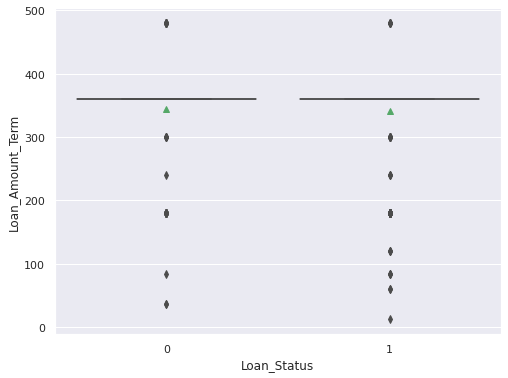

In [27]:

var='Loan_Status'
for i in num_cols:
    data_1=pd.concat([data[i],data[var]],axis=1)
    f,axes=plt.subplots(figsize=(8,6))
    fig=sns.boxplot(x=var,y=i,data=data_1,showmeans=True)
    plt.show()

# Missing Value Treatment

In [28]:
data.isna().sum().sort_values(ascending=False)

Credit_History       50
Self_Employed        32
LoanAmount           22
Dependents           15
Loan_Amount_Term     14
Gender               13
Married               3
Loan_ID               0
Education             0
ApplicantIncome       0
CoapplicantIncome     0
Property_Area         0
Loan_Status           0
dtype: int64

In [29]:
null_cols=['Credit_History','Self_Employed','Dependents','Loan_Amount_Term','Gender','Married']

In [30]:
null_cols

['Credit_History',
 'Self_Employed',
 'Dependents',
 'Loan_Amount_Term',
 'Gender',
 'Married']

In [31]:
for i in null_cols:
    print(f"Missing in {i} column will br replaced by its mode - {data[i].dropna().mode().values[0]}")
    data[i]=data[i].fillna(data[i].dropna().mode().values[0])

Missing in Credit_History column will br replaced by its mode - 1.0
Missing in Self_Employed column will br replaced by its mode - No
Missing in Dependents column will br replaced by its mode - 0
Missing in Loan_Amount_Term column will br replaced by its mode - 360.0
Missing in Gender column will br replaced by its mode - Male
Missing in Married column will br replaced by its mode - Yes


In [32]:
#Missing value is fill by median because outlier present in data and median not affected by outlier
data['LoanAmount']=data['LoanAmount'].fillna(data['LoanAmount'].median())

In [33]:
data.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [34]:
data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status            int32
dtype: object

# Outlier Detection

In [35]:
#for tree based methods outlier skipped

In [36]:
for col in num_cols:
    print("calculation for columns - ",col)
    q1=data[col].quantile(0.25)
    q3=data[col].quantile(0.75)
    IQR=q3-q1
    low_lim=q1-1.5*IQR
    up_lim=q3+1.5*IQR
    print("Lower limit is -",low_lim)
    print("Upper limit is -", up_lim)
    outlier=[]
    
    for x in data[col]:
        if((x<low_lim) or (x>up_lim)):
            outlier.append(x)
            
    print("outlier in the dataset is",outlier, '\n')
    
   # Removing outliers
    data.loc[data[col]<low_lim,col]=low_lim
    data.loc[data[col]>up_lim,col]=up_lim

calculation for columns -  ApplicantIncome
Lower limit is - -1498.75
Upper limit is - 10171.25
outlier in the dataset is [12841, 12500, 11500, 10750, 13650, 11417, 14583, 10408, 23803, 10513, 20166, 14999, 11757, 14866, 39999, 51763, 33846, 39147, 12000, 11000, 16250, 14683, 11146, 14583, 20667, 20233, 15000, 63337, 19730, 15759, 81000, 14880, 12876, 10416, 37719, 16692, 16525, 16667, 10833, 18333, 17263, 20833, 13262, 17500, 11250, 18165, 19484, 16666, 16120, 12000] 

calculation for columns -  CoapplicantIncome
Lower limit is - -3445.875
Upper limit is - 5743.125
outlier in the dataset is [10968.0, 8106.0, 7210.0, 8980.0, 7750.0, 11300.0, 7250.0, 7101.0, 6250.0, 7873.0, 20000.0, 20000.0, 8333.0, 6667.0, 6666.0, 7166.0, 33837.0, 41667.0] 

calculation for columns -  LoanAmount
Lower limit is - 3.5
Upper limit is - 261.5
outlier in the dataset is [267.0, 349.0, 315.0, 320.0, 286.0, 312.0, 265.0, 370.0, 650.0, 290.0, 600.0, 275.0, 700.0, 495.0, 280.0, 279.0, 304.0, 330.0, 436.0, 480.0, 

<AxesSubplot:xlabel='ApplicantIncome'>

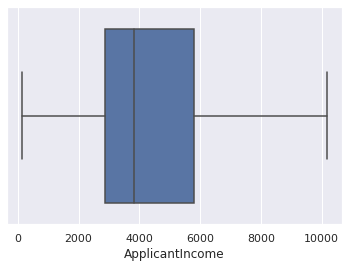

In [37]:
sns.boxplot(x="ApplicantIncome",data=data)

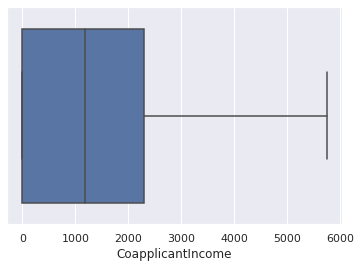

In [38]:
sns.boxplot("CoapplicantIncome",data=data)
plt.show()

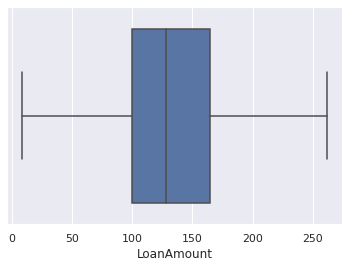

In [39]:
sns.boxplot("LoanAmount",data=data)
plt.show()

In [40]:
#all value remove null values

In [41]:
cat_cols

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Credit_History',
 'Property_Area',
 'Loan_Status']

In [42]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849.0,0.0,128.0,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583.0,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000.0,0.0,141.0,360.0,1.0,Urban,1


In [43]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

cols=["Gender","Married","Education","Self_Employed","Property_Area"]

for col in cols:
    data[col]=le.fit_transform(data[col])

In [44]:
data["Gender"].value_counts()

1    502
0    112
Name: Gender, dtype: int64

In [45]:
data["Married"].value_counts()

1    401
0    213
Name: Married, dtype: int64

In [46]:
data["Property_Area"].value_counts()

1    233
2    202
0    179
Name: Property_Area, dtype: int64

In [47]:
data.dtypes

Loan_ID               object
Gender                 int32
Married                int32
Dependents            object
Education              int32
Self_Employed          int32
ApplicantIncome      float64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int32
Loan_Status            int32
dtype: object

In [48]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,5849.0,0.0,128.0,360.0,1.0,2,1
1,LP001003,1,1,1,0,0,4583.0,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,0,1,3000.0,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,1,0,2583.0,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,0,0,6000.0,0.0,141.0,360.0,1.0,2,1


In [49]:
for col in cat_cols:
    print()
    print(col)
    
    print(data[col].value_counts())


Gender
1    502
0    112
Name: Gender, dtype: int64

Married
1    401
0    213
Name: Married, dtype: int64

Dependents
0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64

Education
0    480
1    134
Name: Education, dtype: int64

Self_Employed
0    532
1     82
Name: Self_Employed, dtype: int64

Credit_History
1.0    525
0.0     89
Name: Credit_History, dtype: int64

Property_Area
1    233
2    202
0    179
Name: Property_Area, dtype: int64

Loan_Status
1    422
0    192
Name: Loan_Status, dtype: int64


In [50]:
data["Dependents"].unique()
#string 

array(['0', '1', '2', '3+'], dtype=object)

In [51]:
data.loc[data['Dependents']=='3+','Dependents']= 3

In [52]:
data['Dependents'].unique()

array(['0', '1', '2', 3], dtype=object)

In [53]:
data['Dependents']=data['Dependents'].astype('int')

In [54]:
data.dtypes

Loan_ID               object
Gender                 int32
Married                int32
Dependents             int32
Education              int32
Self_Employed          int32
ApplicantIncome      float64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int32
Loan_Status            int32
dtype: object

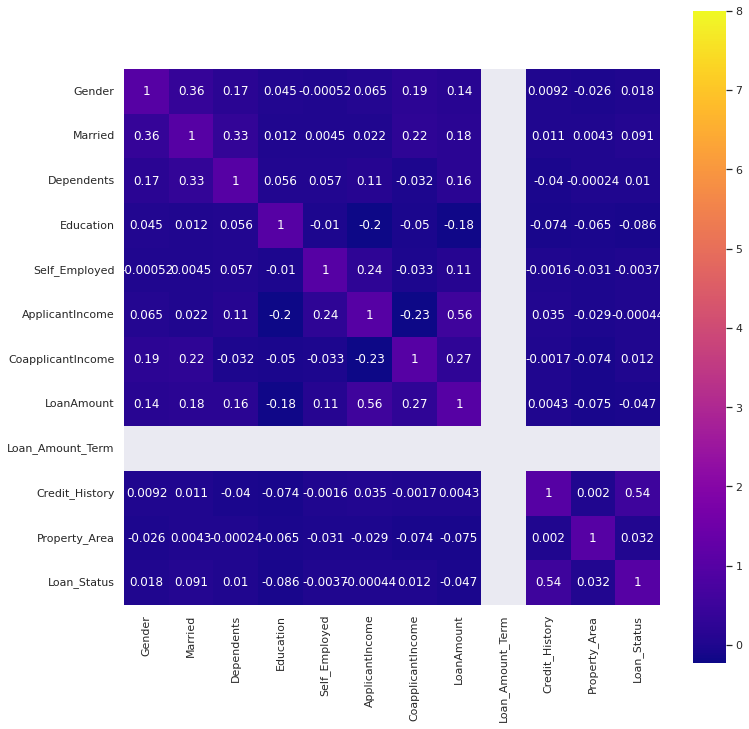

In [55]:
#correlation matrix
corrmat=data.corr()
f,axes=plt.subplots(figsize=(12,12))
sns.heatmap(corrmat, vmax=8, square=True, annot=True ,cmap="plasma")
plt.show()

# Feature Engineering

Total Income

In [56]:
data['TotalIncome']=data['ApplicantIncome']+data['CoapplicantIncome']

Debt to Income Ratio

In [57]:
data['DebtIncomeRatio']=data['LoanAmount']/data['TotalIncome']

Dependents and Income Ratio

In [58]:
data['DependentsIncomeRatio']=data['Dependents']/data['TotalIncome']

# Model Building

In [59]:
data.dtypes

Loan_ID                   object
Gender                     int32
Married                    int32
Dependents                 int32
Education                  int32
Self_Employed              int32
ApplicantIncome          float64
CoapplicantIncome        float64
LoanAmount               float64
Loan_Amount_Term         float64
Credit_History           float64
Property_Area              int32
Loan_Status                int32
TotalIncome              float64
DebtIncomeRatio          float64
DependentsIncomeRatio    float64
dtype: object

In [60]:
del data['Loan_ID']

In [61]:
data.dtypes

Gender                     int32
Married                    int32
Dependents                 int32
Education                  int32
Self_Employed              int32
ApplicantIncome          float64
CoapplicantIncome        float64
LoanAmount               float64
Loan_Amount_Term         float64
Credit_History           float64
Property_Area              int32
Loan_Status                int32
TotalIncome              float64
DebtIncomeRatio          float64
DependentsIncomeRatio    float64
dtype: object

In [62]:
data.isna().sum()

Gender                   0
Married                  0
Dependents               0
Education                0
Self_Employed            0
ApplicantIncome          0
CoapplicantIncome        0
LoanAmount               0
Loan_Amount_Term         0
Credit_History           0
Property_Area            0
Loan_Status              0
TotalIncome              0
DebtIncomeRatio          0
DependentsIncomeRatio    0
dtype: int64

In [63]:
X=data.drop(['Loan_Status'],axis=1)
y=data['Loan_Status']

In [64]:
X.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,TotalIncome,DebtIncomeRatio,DependentsIncomeRatio
0,1,0,0,0,0,5849.0,0.0,128.0,360.0,1.0,2,5849.0,0.021884,0.000000
1,1,1,1,0,0,4583.0,1508.0,128.0,360.0,1.0,0,6091.0,0.021015,0.000164
2,1,1,0,0,1,3000.0,0.0,66.0,360.0,1.0,2,3000.0,0.022000,0.000000
3,1,1,0,1,0,2583.0,2358.0,120.0,360.0,1.0,2,4941.0,0.024287,0.000000
4,1,0,0,0,0,6000.0,0.0,141.0,360.0,1.0,2,6000.0,0.023500,0.000000


In [65]:
from sklearn.model_selection import train_test_split,KFold
X_train,X_test,y_train,y_test=train_test_split(X,
                                              y,
                                              test_size=0.2,
                                              random_state=0)

In [66]:
from sklearn.preprocessing import StandardScaler

sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [67]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier

Logistic Model

In [68]:
logmodel=LogisticRegression()
logmodel.fit(X_train,y_train)
logpredict=logmodel.predict(X_test)

In [69]:
logpredict

array([1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1])

In [88]:
metrics.accuracy_score(logpredict,y_test)

0.8373983739837398

In [90]:
logpredicts=logmodel.predict(X_train)
metrics.accuracy_score(logpredicts,y_train)

0.8105906313645621

Decision Tree

In [70]:
dtmodel=DecisionTreeClassifier()
dtmodel.fit(X_train,y_train)
dtpredict=dtmodel.predict(X_test)

In [71]:
dtpredict

array([1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1])

Random Forest

In [72]:
rfmodel=RandomForestClassifier()
rfmodel.fit(X_train,y_train)
rfpredict=rfmodel.predict(X_test)

Naive Bayes

In [73]:
nbmodel=GaussianNB()
nbmodel.fit(X_train,y_train)
nbpredict=nbmodel.predict(X_test)

Gradient Boosting 

In [74]:
gbmodel=GradientBoostingClassifier()
gbmodel.fit(X_train,y_train)
gbpredict=gbmodel.predict(X_test)

Kneighbors

In [75]:
knmodel=KNeighborsClassifier()
knmodel.fit(X_train,y_train)
knpredict=knmodel.predict(X_test)

In [76]:
from sklearn import metrics
for pred in [logpredict,dtpredict,rfpredict,nbpredict,gbpredict,knpredict]:
    print("Accuracy :-",metrics.accuracy_score(y_test,pred))

Accuracy :- 0.8373983739837398
Accuracy :- 0.7235772357723578
Accuracy :- 0.8211382113821138
Accuracy :- 0.8292682926829268
Accuracy :- 0.8211382113821138
Accuracy :- 0.7967479674796748


In [77]:
from sklearn import metrics
for pred in [logpredict,dtpredict,rfpredict,nbpredict,gbpredict,knpredict]:
    print("comfusion_matrix :-",metrics.confusion_matrix(y_test,pred))
   

comfusion_matrix :- [[15 18]
 [ 2 88]]
comfusion_matrix :- [[14 19]
 [15 75]]
comfusion_matrix :- [[17 16]
 [ 6 84]]
comfusion_matrix :- [[14 19]
 [ 2 88]]
comfusion_matrix :- [[16 17]
 [ 5 85]]
comfusion_matrix :- [[14 19]
 [ 6 84]]


Random Forest

In [78]:
from sklearn.model_selection import GridSearchCV
grid_param={"n_estimators":[100,300,500,800,1000],
           "criterion":["gini","entropy"],
           "max_depth":[3,5,7]}

gd_sr=GridSearchCV(estimator=rfmodel,
                  param_grid=grid_param,
                  scoring="accuracy",
                  cv=5,
                  n_jobs=-1)
gd_sr.fit(X_train,y_train)
print(gd_sr.best_params_)   #give best para meters w

{'criterion': 'gini', 'max_depth': 7, 'n_estimators': 500}


In [79]:
rfmodel=RandomForestClassifier(criterion="entropy",max_depth=7,n_estimators=300)
rfmodel.fit(X_train,y_train)
rfpredict=rfmodel.predict(X_test)
rfproba=rfmodel.predict_proba(X_test)

Accuracy: 0.8455284552845529
Confusion Matrix: [[16 17]
 [ 2 88]]
ROC_AUC_SCORE is: 0.7313131313131314


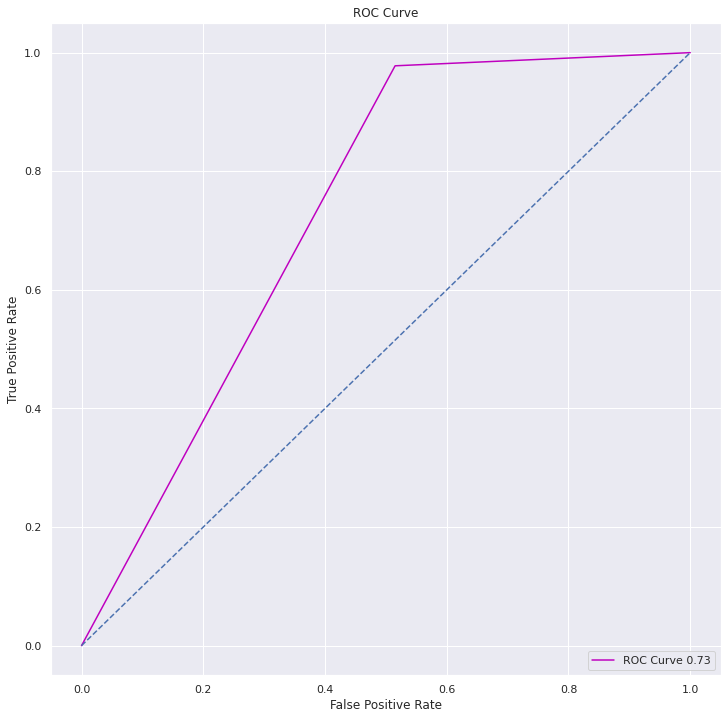

In [80]:
from sklearn.metrics import roc_auc_score,mean_squared_error,accuracy_score,roc_curve,confusion_matrix,auc

fpr,tpr,threshold=roc_curve(y_test,rfpredict)
roc_auc=auc(fpr,tpr)
roc_auc
print('Accuracy:',accuracy_score(y_test,rfpredict))
print('Confusion Matrix:',confusion_matrix(y_test,rfpredict))
print("ROC_AUC_SCORE is:",roc_auc_score(y_test,rfpredict))

plt.figure(figsize=(12,12))
plt.plot(fpr,tpr,label='ROC Curve %0.2f' % roc_auc,color='m')

sns.lineplot([0,1],[0,1],linestyle="--")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()

Accuracy: 0.8455284552845529
Confusion Matrix: [[16 17]
 [ 2 88]]
ROC_AUC_SCORE is: 0.7313131313131314


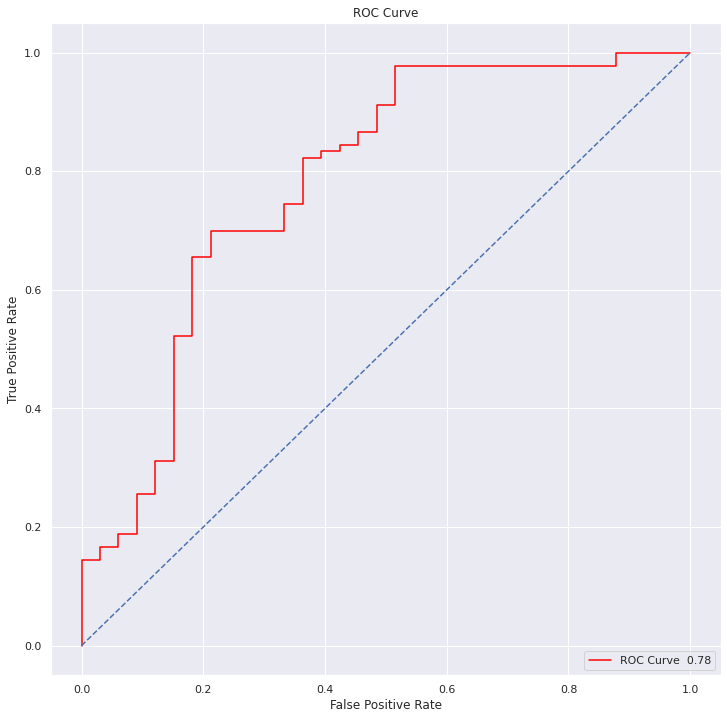

In [81]:
from sklearn.metrics import roc_auc_score,mean_squared_error,accuracy_score,roc_curve,confusion_matrix,auc

fpr,tpr,threshold=roc_curve(y_test,rfproba[: :,1])
roc_auc=auc(fpr,tpr)
roc_auc
print('Accuracy:',accuracy_score(y_test,rfpredict))
print('Confusion Matrix:',confusion_matrix(y_test,rfpredict))
print("ROC_AUC_SCORE is:",roc_auc_score(y_test,rfpredict))


plt.figure(figsize=(12,12))
plt.plot(fpr,tpr,label="ROC Curve % 0.2f" %roc_auc,color="r")

sns.lineplot([0,1],[0,1],linestyle="--")



plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()

In [82]:
from sklearn.metrics import classification_report
print(classification_report(rfpredict,y_test))

              precision    recall  f1-score   support

           0       0.48      0.89      0.63        18
           1       0.98      0.84      0.90       105

    accuracy                           0.85       123
   macro avg       0.73      0.86      0.77       123
weighted avg       0.91      0.85      0.86       123



In [83]:
#cheak IMPORTANCE Features
feature_importances_df=pd.DataFrame({'Feature':list(X.columns),
                                    "Importance":rfmodel.feature_importances_}).sort_values("Importance",ascending=False)

feature_importances_df

,Feature,Importance
9,Credit_History,0.344565
12,DebtIncomeRatio,0.132383
11,TotalIncome,0.111096
7,LoanAmount,0.093243
5,ApplicantIncome,0.087940
13,DependentsIncomeRatio,0.060873
6,CoapplicantIncome,0.057666
10,Property_Area,0.034857
2,Dependents,0.025156
3,Education,0.015822


findfont: Font family ['sans_self'] not found. Falling back to DejaVu Sans.


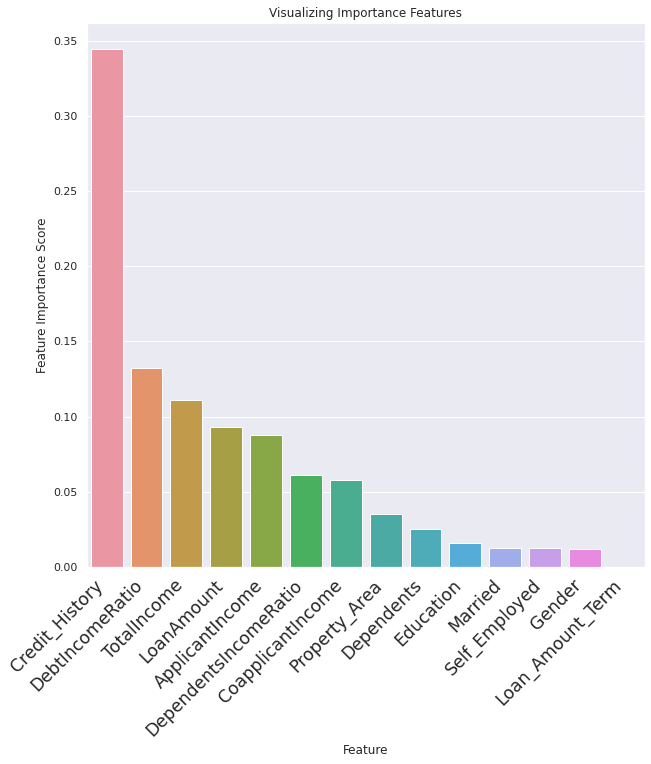

In [84]:
#visualization importance Features
plt.figure(figsize=(10,10))
sns.barplot(x='Feature',y='Importance',data=feature_importances_df)
plt.xticks(rotation=45,horizontalalignment='right',fontweight='light',fontsize='x-large')
plt.ylabel('Feature Importance Score')
plt.xlabel('Feature')
plt.title('Visualizing Importance Features')
plt.show()        

In [85]:
#i take only most top imp feature

In [86]:
imp_var=['Credit_History','DebtIncomeRatio','TotalIncome','Loanamount','DependentsIncomeRatio']

In [91]:
#rfmodels = RandomForestClassifier(criterion="entropy", max_depth=7, n_estimators=300)
##rfmodels.fit(X_train[imp_var], y_train)
#rfpredict = rfmodels.predict(X_test[imp_var])


In [92]:
metrics.accuracy_score(rfpredict,y_test)

0.8455284552845529

# Gradient boosting

In [93]:
from sklearn.model_selection import GridSearchCV
grid_param={"n_estimators":[100,300,500,800,1000],
           "learning_rate":[0.1,0.05,0.01],
           "max_depth":[3,5,7]}



gd_sr=GridSearchCV(estimator=gbmodel,
                  param_grid=grid_param,
                  scoring="roc_auc",
                  cv=5,
                  n_jobs=-1)
gd_sr.fit(X_train,y_train)
print(gd_sr.best_params_)   

{'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 500}


In [94]:
gbmodel=GradientBoostingClassifier(learning_rate=0.1,max_depth=7,n_estimators=800)
gbmodel.fit(X_train,y_train)
gbpredict=gbmodel.predict(X_test)

In [95]:
accuracy_score(gbpredict,y_test)

0.7967479674796748

Accuracy: 0.7967479674796748
Confusion Matrix: [[19 14]
 [11 79]]
ROC_AUC_SCORE is: 0.7267676767676767


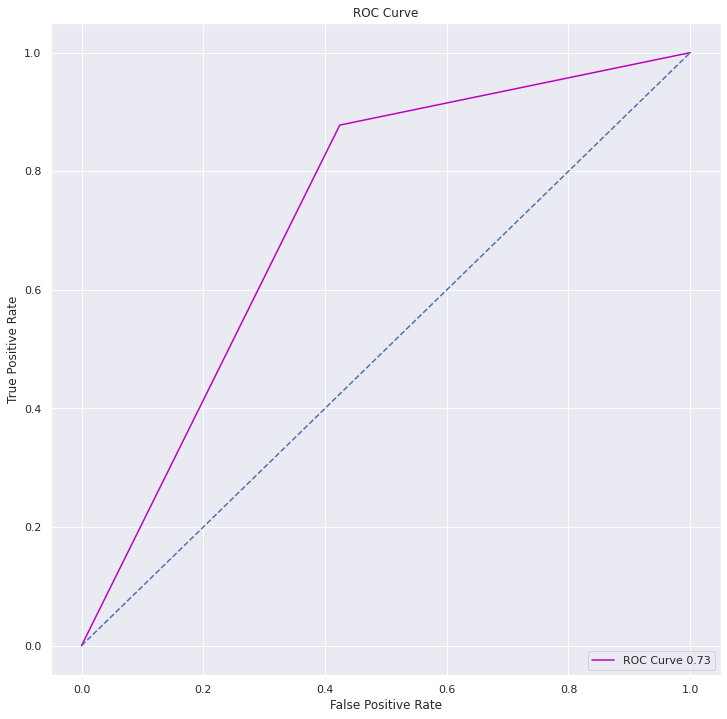

In [96]:
from sklearn.metrics import roc_auc_score,mean_squared_error,accuracy_score,roc_curve,confusion_matrix,auc

fpr,tpr,threshold=roc_curve(y_test,gbpredict)
roc_auc=auc(fpr,tpr)
roc_auc
print('Accuracy:',accuracy_score(y_test,gbpredict))
print('Confusion Matrix:',confusion_matrix(y_test,gbpredict))
print("ROC_AUC_SCORE is:",roc_auc_score(y_test,gbpredict))

plt.figure(figsize=(12,12))
plt.plot(fpr,tpr,label='ROC Curve %0.2f' % roc_auc,color='m')

sns.lineplot([0,1],[0,1],linestyle="--")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()

In [97]:
from sklearn.ensemble import VotingClassifier

In [98]:
#cheak for overfiting

In [99]:
ensemble_clf = VotingClassifier(
    estimators=[('rf', rfmodel), ('lr', logmodel), ('nb', nbmodel), ('dt', dtmodel)],
    voting='soft'  
)

In [100]:
ensemble_clf

VotingClassifier(estimators=[('rf',
                              RandomForestClassifier(criterion='entropy',
                                                     max_depth=7,
                                                     n_estimators=300)),
                             ('lr', LogisticRegression()), ('nb', GaussianNB()),
                             ('dt', DecisionTreeClassifier())],
                 voting='soft')

In [101]:
ensemble_clf.fit(X_train,y_train)

VotingClassifier(estimators=[('rf',
                              RandomForestClassifier(criterion='entropy',
                                                     max_depth=7,
                                                     n_estimators=300)),
                             ('lr', LogisticRegression()), ('nb', GaussianNB()),
                             ('dt', DecisionTreeClassifier())],
                 voting='soft')

In [ ]:
y_predicted=ensemble_clf.predict(X_test)

In [ ]:
accuracy_score(y_test,y_predicted)